# GRIP@The Sparks Foundation
# IoT and Computer Vision
# TASK 2: Color Detection in Images
# By: Pranavi Kakani

This task requires us to implement a color detector which identifies all the colors in an image or video. For this task, we will be using an image.

First, importing all required libraries -

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans
from skimage.color import rgb2lab, deltaE_cie76

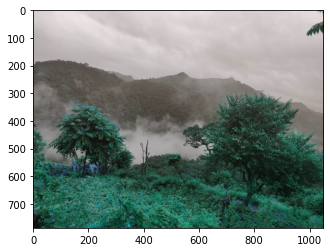

In [11]:
image = cv2.imread(r'C:\Users\PRANAVI KAKANI\Pictures\PICTURE.jpg')
plt.imshow(image)
plt.show()

In [12]:
print("Type of this input: {}".format(type(image)))
print("Shape: {}".format(image.shape))

Type of this input: <class 'numpy.ndarray'>
Shape: (787, 1050, 3)


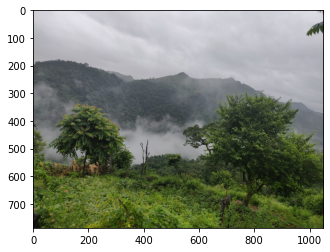

In [13]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

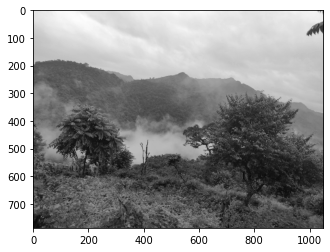

In [14]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap = 'gray')
plt.show()

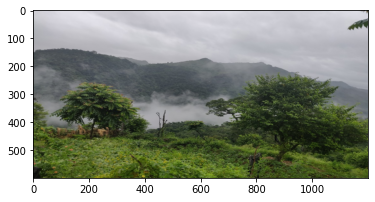

In [15]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)
plt.show()

In [16]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [17]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [19]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    counts = dict(sorted(counts.items()))

    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors

[array([178.95596405, 179.53744553, 185.97224946]),
 array([53.76371369, 66.42744778, 32.98272497]),
 array([108.3393414 , 123.65991019,  57.18011725]),
 array([119.90793857, 124.39134761, 124.34782609]),
 array([206.01321179, 205.70848526, 213.18424488]),
 array([28.90722218, 37.7889608 , 18.98356255]),
 array([77.9254386 , 94.62201611, 38.53595053]),
 array([82.96584771, 89.65715979, 90.85509156])]

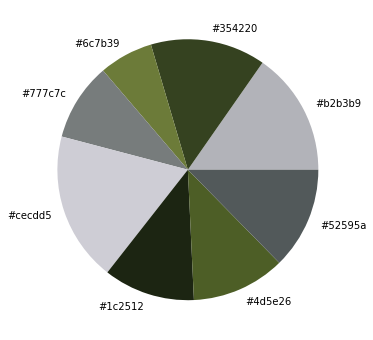

In [21]:
get_colors(get_image(r'C:\Users\PRANAVI KAKANI\Pictures\PICTURE.jpg'), 8, True)

In [23]:
IMAGE_DIRECTORY = r'C:\Users\PRANAVI KAKANI\Pictures\IMAGES'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

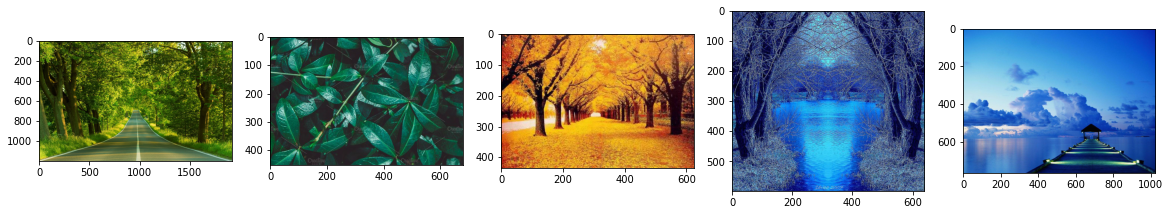

In [24]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [25]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [26]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

Filtering images with "Green Color" -

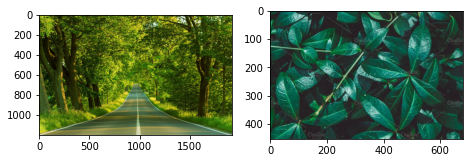

In [28]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

Filtering images with "Blue Color" -

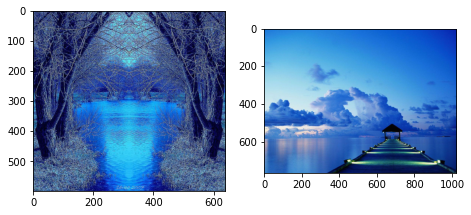

In [30]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

Filtering images with "Yellow Color" -

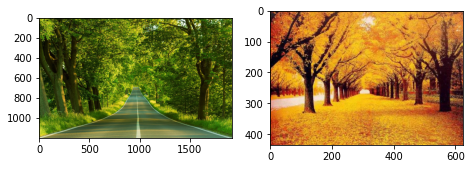

In [31]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

# Conclusion

We have implemented a color detector which is capable of filtering images based on its primary color.